In [ ]:
#Creamos carpetas para imagenes
!mkdir cruz

In [ ]:
#Descomprimir carpetas
%cd cruz
!unzip cruz.zip
%cd ..

In [ ]:
#Borramos archivo .zip
!rm -rf /content/cruz/cruz.zip

In [ ]:
#Mostramos número de imagenes en cada carpeta
!ls /content/cruz | wc -l #365

365


In [ ]:
#Creamos carpeta para crear el set de datos.

!mkdir dataset
!mkdir dataset/cruces_nuevo

In [ ]:
#Copiamos las imagenes que subimos a la carpeta de dataset
#Limitamos las imagenes para que tengan el mismo número
#Para circulos

import shutil
import os
carpeta_fuente = '/content/cruz'
carpeta_destino = '/content/dataset/cruces_nuevo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 250: #Limitamos las imagenes
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostramos número de imagenes en cada carpeta del Dataset
!ls /content/dataset/cruces_nuevo | wc -l #250

250


In [ ]:
#Importamos librerias
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, image, img_to_array

In [ ]:
#Creamos una carpeta donde almacenara las nuevas imagnes
#!mkdir nuevo
cruz_nuevo='cruz_nuevo'
#Definimos cuantas imagenes nuevas se van a generar por cada imagen original
images_increased = 5

try:
    os.mkdir(cruz_nuevo)
except:
    print("")
#Llamos a nuestro generador de datos y realizamos su configuración
train_datagen = ImageDataGenerator(
    rotation_range=20, #Rotación
    zoom_range=0.2, #Zoom de 20%+-
    width_shift_range=0.1,#Corrimiento del ancho del 10%
    height_shift_range=0.1,##Corrimiento del alto del 10%
    horizontal_flip=True,
    vertical_flip=False)


data_path = "/content/dataset/cruces_nuevo" #Elegimos la carperta de origen donde va a generar las nuevas imagnes
data_dir_list = os.listdir(data_path) #Tomamos la lista data_path


width_shape, height_shape = 224, 244 #Definimos ancho y alto
#Definimos un contador
i=0
num_images=0
for image_file in data_dir_list:
    img_list=os.listdir(data_path)

    img_path = data_path + '/'+ image_file

    imge=load_img(img_path)

    imge=cv2.resize(image.img_to_array(imge), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
    x= imge/255
    x=np.expand_dims(x,axis=0)
    t=1
    for output_batch in train_datagen.flow(x,batch_size=1):
        a=image.img_to_array(output_batch[0])
        imagen=output_batch[0,:,:]*255
        imgfinal = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        cv2.imwrite(cruz_nuevo+"/%i%i.jpg"%(i,t), imgfinal)
        t+=1

        num_images+=1
        if t>images_increased:
            break
    i+=1

print("images generated",num_images)

images generated 1250


In [ ]:
#Mostramos número de imagenes en cada carpeta del Dataset
!ls /content/cruz_nuevo | wc -l #250

1250


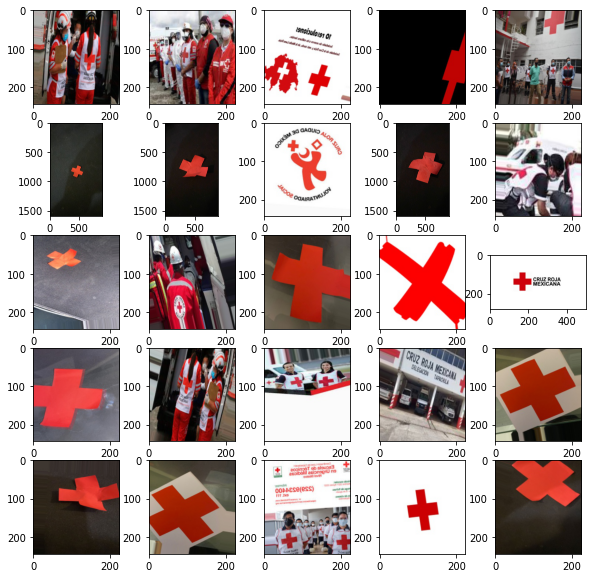

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))

carpeta = '/content/cruz/'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)